In [1]:
import pandas as pd
import os
import numpy as np
import requests
from googlesearch import search

In [2]:
url_link = 'https://infoetudes.com/liste-adresses-et-contacts-des-universites-ecoles-de-formations-et-instituts-du-senegal/'
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
unis = pd.read_html(r.text)[0]
unis

,0,1,2,3
0,Les universités,Les universités,Les universités,Les universités
1,NOM,ADRESSE,DETAILS,DETAILS
2,Université Cheikh Anta Diop de Dakar (UCAD),"Avenue Cheikh Anta Diop, Dakar BP 5005 Dakar-Fann","Faculté des sciences et techniques, de lédecin...","Faculté des sciences et techniques, de lédecin..."
3,Université Gaston Berger de Saint-Louis (UGB),"Sanar, Saint-Louis BP 234 Saint-Louis","Filières scientifiques et technologiques, gest...","Filières scientifiques et technologiques, gest..."
4,Université Dakar Bourguiba (UDB),"12, Avenue Bourguiba, Dakar","Génie juridique, génie gestion économique, sci...","Génie juridique, génie gestion économique, sci..."
...,...,...,...,...
88,"École supérieure d’informatique, de management...","32 Nord Foire Azur, Dakar","32 Nord Foire Azur, Dakar","Informatique de gestion, télécommunications, m..."
89,Sup Info (International IT Academy of Dakar),"3, rue Aristide Le Dantec x rue Huart BP 21104...","3, rue Aristide Le Dantec x rue Huart BP 21104...","Formation continue, licence, masters pro, dipl..."
90,"Institut supérieur de formation en management,...","Avenue Birago Diop x G, Point E","Avenue Birago Diop x G, Point E","Informatique et télécommunication, management"
91,Sup’Imax (Institut supérieur des arts et métie...,"88, Boulevard du Président Habib Bourguiba (en...","88, Boulevard du Président Habib Bourguiba (en...","Enseignement supérieur et professionnel, centr..."


In [3]:
unis = unis.transpose()

In [4]:
unis.drop(0,axis=1,inplace=True)

In [5]:
unis.set_index(1,inplace=True)

In [6]:
unis = unis.transpose()

In [7]:
unis.reset_index(inplace=True)

In [8]:
unis.drop('index',axis=1,inplace=True)

In [9]:
unis.columns = ['nom', 'adresse', 'details[1]', 'details']


In [10]:
unis

,nom,adresse,details[1],details
0,Université Cheikh Anta Diop de Dakar (UCAD),"Avenue Cheikh Anta Diop, Dakar BP 5005 Dakar-Fann","Faculté des sciences et techniques, de lédecin...","Faculté des sciences et techniques, de lédecin..."
1,Université Gaston Berger de Saint-Louis (UGB),"Sanar, Saint-Louis BP 234 Saint-Louis","Filières scientifiques et technologiques, gest...","Filières scientifiques et technologiques, gest..."
2,Université Dakar Bourguiba (UDB),"12, Avenue Bourguiba, Dakar","Génie juridique, génie gestion économique, sci...","Génie juridique, génie gestion économique, sci..."
3,Université du Sahel,"33, Rue MZ-198 Mermoz BP 5355, Dakar-Fann","Sciences et technologies, Sciences économiques...","Sciences et technologies, Sciences économiques..."
4,Agence universitaire de la Francophonie (AUF),Corniche Ouest En face de la résidence de l’am...,Opérateur de la Francophonie institutionnelle ...,Opérateur de la Francophonie institutionnelle ...
...,...,...,...,...
86,"École supérieure d’informatique, de management...","32 Nord Foire Azur, Dakar","32 Nord Foire Azur, Dakar","Informatique de gestion, télécommunications, m..."
87,Sup Info (International IT Academy of Dakar),"3, rue Aristide Le Dantec x rue Huart BP 21104...","3, rue Aristide Le Dantec x rue Huart BP 21104...","Formation continue, licence, masters pro, dipl..."
88,"Institut supérieur de formation en management,...","Avenue Birago Diop x G, Point E","Avenue Birago Diop x G, Point E","Informatique et télécommunication, management"
89,Sup’Imax (Institut supérieur des arts et métie...,"88, Boulevard du Président Habib Bourguiba (en...","88, Boulevard du Président Habib Bourguiba (en...","Enseignement supérieur et professionnel, centr..."


In [11]:
unis.dropna(thresh=3,inplace=True)

In [12]:
unis.drop('details[1]',axis=1,inplace=True)

In [13]:
unis.to_excel('unis_output.xlsx')

In [14]:
unis = pd.read_excel('unis_output_cor.xlsx','Sheet1')
unis.drop('Unnamed: 0',axis=1,inplace=True)
unis["nom"] = unis["nom"].str.lower()
unis["adresse"] = unis["adresse"].str.lower()
unis["details"] = unis["details"].str.lower()
unis.fillna('',inplace=True)

In [15]:
keyword_list = []

for ndet in unis['details']:
    ndet = ndet.replace(",","")
    ndet = ndet.replace(".","")
    ndet = ndet.replace("…","")
    ndet = ndet.replace("’", " ")
    ndet = ndet.replace("/", " ")
    for i in set(ndet.split()):
        if len(i) > 2:
            keyword_list.append(i)
    


In [16]:
new_keyword_list=[]
for i in keyword_list:
    if i[-1] == 's': i = i[:-1]
    if len(i) > 2:
        new_keyword_list.append(i)


In [17]:
keyword_series = pd.Series(new_keyword_list)

In [18]:
keyword_series.value_counts().to_csv('keywordlist')

In [19]:
keyword_series = pd.read_csv('keywordlist_cor.txt')

In [20]:
keyword_series

,keyword,count
0,gestion,36
1,informatique,27
2,management,26
3,international,20
4,marketing,17
...,...,...
68,audiovisuel,2
69,public,2
70,vocation,2
71,anglai,2


In [21]:
unis = pd.read_excel('unis_output_cor.xlsx','Sheet1')
unis.drop('Unnamed: 0',axis=1,inplace=True)
unis["nom"] = unis["nom"]
unis["adresse"] = unis["adresse"]
unis["details"] = unis["details"]
unis.fillna('',inplace=True)

In [22]:
unis['details']

0     Faculté des sciences et techniques, de médecin...
1     Filières scientifiques et technologiques, gest...
2     Génie juridique, génie gestion économique, sci...
3     Sciences et technologies, Sciences économiques...
4     Opérateur de la Francophonie institutionnelle ...
                            ...                        
90                                                     
91                                                     
92                                                     
93                                                     
94                                                     
Name: details, Length: 95, dtype: object

In [23]:
details_mod = []

for i in unis['details']:
    phrase = ''
    i = i.replace(",","")
    i = i.replace(".","")
    i = i.replace("…","")
    i = i.replace("’", " ")
    i = i.replace("/", " ")
    for word in i.split():
        if word[-1] == 's': 
            word = word[:-1]
        phrase = phrase +''.join(word) + ' '
    details_mod.append(phrase)


In [24]:
unis['keywords_raw'] = details_mod

In [25]:
unis.drop(unis.iloc[:, 3:11], inplace = True, axis = 1)


In [26]:
keywords = []

for i in unis['keywords_raw']:
    temp_key = []
    for word in i.split():
        if word in keyword_series.iloc[:,0].values:
            temp_key.append(word)
    keywords.append(list(set(temp_key)))

In [27]:
unis['keywords'] = keywords

In [28]:
unis

,nom,adresse,details,keywords_raw,keywords
0,Université Cheikh Anta Diop de Dakar (UCAD),"Avenue Cheikh Anta Diop, Dakar BP 5005 Dakar-Fann","Faculté des sciences et techniques, de médecin...",Faculté de science et technique de médecine ph...,"[politique, technique, lettre, gestion, format..."
1,Université Gaston Berger de Saint-Louis (UGB),"Sanar, Saint-Louis BP 234 Saint-Louis","Filières scientifiques et technologiques, gest...",Filière scientifique et technologique gestion ...,"[tourisme, technologie, science, gestion]"
2,Université Dakar Bourguiba (UDB),"12, Avenue Bourguiba, Dakar","Génie juridique, génie gestion économique, sci...",Génie juridique génie gestion économique scien...,"[affaire, gestion, juridique, technologie, soc..."
3,Université du Sahel,"33, Rue MZ-198 Mermoz BP 5355, Dakar-Fann","Sciences et technologies, Sciences économiques...",Science et technologie Science économique et g...,"[politique, gestion, lettre, juridique, techno..."
4,Agence universitaire de la Francophonie (AUF),Corniche Ouest En face de la résidence de l’am...,Opérateur de la Francophonie institutionnelle ...,Opérateur de la Francophonie institutionnelle ...,"[recherche, enseignement]"
...,...,...,...,...,...
90,,,,,[]
91,,,,,[]
92,,,,,[]
93,,,,,[]


In [29]:
unis.drop([89,90,91,92,93,94],axis=0,inplace=True)

In [30]:
#links = []

#for i in unis['nom']:
    #query = i + 'senegal'
    #for j in search(query, tld="sn", stop=1):
        #links.append(j)


In [31]:
kw = 'communication'
unis_filt = unis.copy()
line = 0

for i in unis_filt['keywords']:
    for word in i:
        if word == kw:
            break
    else:
        unis_filt.drop(line,axis=0,inplace=True)

    line += 1

unis_filt.drop(unis_filt.iloc[:,3:4],axis=1)

,nom,adresse,details,keywords
11,Institut supérieur d’entrepreneurship et de ge...,"Sicap Sacré Coeur 1 N°8469, Dakar","Journalisme et communication, banque assurance...","[affaire, assurance, finance, communication, t..."
32,Institut supérieur des sciences de l’informati...,Sacré Coeur 3 Pyrotechnique lot 90 sur l’ancie...,"Information, communication, journalisme","[journalisme, communication]"
37,Institut de formation en marketing (IFMC),"Liberté 6 extension, villa 8189","Marketing et communication, commerce internati...","[management, international, communication, com..."
39,International Consulting Institut (ICI),"Immeuble Ndindy B, Rue Marchant x Rue du Liban...","Bac + 3 et masters : banque, finance et assura...","[assurance, finance, communication, ressource,..."
44,Up’Tech,"Km 4,5 Avenue Cheikh Anta Diop, Dakar",Institut supérieur de formation aux nouveaux m...,"[communication, informatique, formation]"
61,Institut afri Il s’apprête à vous faire des ré...,"Mermoz, villa 7606, Dakar BP 15391 Dakar","Marketing, finances, comptabilité, communicati...","[ressource, finance, communication, transport,..."
67,"EJICOM (École Supérieure de journalisme, des m...","Zone A, villa 33, face jardin public","Journalisme, communication",[communication]
72,Institut d’études supérieures de management et...,"Parcelles Assainies, Unité 14 n 403","Gestion, droit des affaires, finance, fiscalit...","[affaire, assurance, finance, management, ress..."
74,Institut technique de commerce (ITECOM),Canal IV Gueule Tapée,"Langues, commerce et gestion, logistique, comm...","[communication, gestion, commerce, internation..."
80,University of Management,"Sipres 4, Immeuble 6 – route de l’Aéroport BP ...","Management, marketing communication, ingénieri...","[assurance, finance, communication, transport,..."


In [32]:
links = []
if os.path.exists('unis_links') == False:
    for i in unis['nom']:
        query = i + ' senegal'
        for j in search(query, tld="sn", stop=1):
            links.append(j)
    unis['liens'] = links
    unis['liens'].to_csv('unis_links')

unis['liens'] = pd.read_csv('unis_links')['liens']

In [33]:
keyword_dict = dict(zip(keyword_series['keyword'],keyword_series['count']))

In [34]:
kws = ['informatique','commerce']
itera = 0
unis_overall = []

for elem in kws:
    line = 0
    unis_perso = unis.copy()
    for i in unis_perso['keywords']:
        for word in i:
            if word == kws[itera]:
                break
        else:
            unis_perso.drop(line,axis=0,inplace=True)

        line += 1
    itera+=1
    unis_overall.append(unis_perso)
     


In [35]:
len(unis_overall)


2

In [36]:
unis_merged = pd.concat(unis_overall)

In [37]:
unis_merged.drop_duplicates(subset='nom',inplace=True)

In [38]:
unis_merged

,nom,adresse,details,keywords_raw,keywords,liens
7,Université virtuelle du Sénégal,"Liberté 6 extension, cité COMICO Dakar",Université numérique basée sur des « Espaces n...,Université numérique basée sur de « Espace num...,"[informatique, juridique, sociologie, économiq...",https://www.au-senegal.com/universite-virtuell...
11,Institut supérieur d’entrepreneurship et de ge...,"Sicap Sacré Coeur 1 N°8469, Dakar","Journalisme et communication, banque assurance...",Journalisme et communication banque assurance ...,"[affaire, assurance, finance, communication, t...",https://www.au-senegal.com/institut-superieur-...
16,"Groupe AFI, l’université de l’entreprise","Rue G, Zone B, Dakar BP 17016 Dakar Liberté","Management juridique et fiscal, informatique e...",Management juridique et fiscal informatique et...,"[fiscal, management, gestion, informatique, ju...",https://afi-ue.sn/
17,Institut privé d’études et de formation en sta...,Sicap Liberté II N°1398 BP 16805 Dakar,"Statistique, informatique appliquée, gestion, ...",Statistique informatique appliquée gestion sui...,"[projet, informatique, gestion]",http://www.inefsagep.org/presentation.php
24,Institut supérieur d’ingénierie de formation (...,Bd Canal IV en face Université Amadou Hampaté ...,Management des micro-entreprises et microfinan...,Management de micro-entreprise et microfinance...,"[douane, transport, management, commerce, gest...",https://www.au-senegal.com/institut-superieur-...
39,International Consulting Institut (ICI),"Immeuble Ndindy B, Rue Marchant x Rue du Liban...","Bac + 3 et masters : banque, finance et assura...",Bac + 3 et master : banque finance et assuranc...,"[assurance, finance, communication, ressource,...",https://www.senegel.org/fr/senegal/organizatio...
44,Up’Tech,"Km 4,5 Avenue Cheikh Anta Diop, Dakar",Institut supérieur de formation aux nouveaux m...,Institut supérieur de formation aux nouveaux m...,"[communication, informatique, formation]","https://www.au-senegal.com/up-tech,5326.html"
46,École supérieure de technologie et de manageme...,"Avenue Cheikh Anta Diop, Dakar (également Rout...","Télécoms, management, énergies renouvelables, ...",Télécom management énergie renouvelable inform...,"[énergie, renouvelable, management, informatique]",https://www.estm.sn/
63,Institut des hautes études (IHE),Route du Méridien Président,"Comptabilité, finance, marketing, commerce int...",Comptabilité finance marketing commerce intern...,"[finance, commerce, gestion, marketing, inform...",http://www.ihedakar.com/
65,Ecole Internationale Privée Sherbrooke,"26, Liberté 6 extension VDN (face rond point S...",Académie Sherbrooke Campus Dakar offre deux pa...,Académie Sherbrooke Campu Dakar offre deux par...,"[fiscal, transport, internationale, informatiq...",https://www.campus.africa/school/ecole-interna...


In [39]:
points = np.zeros(len(unis_merged))
freq_values = []

for elem in kws:
    count = 0
    temp_values = []
    for i in unis_merged['keywords']:
        if elem in i:
            points[count] += 1
            temp_values.append(elem)
        else:
            temp_values.append('')
        count +=1
    freq_values.append(temp_values)

points

array([1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [40]:
unis_merged['frequency'] = points
freq_values

[['informatique',
  'informatique',
  'informatique',
  'informatique',
  'informatique',
  'informatique',
  'informatique',
  'informatique',
  'informatique',
  'informatique',
  'informatique',
  'informatique',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  'commerce',
  '',
  '',
  'commerce',
  '',
  '',
  '',
  'commerce',
  '',
  '',
  'commerce',
  'commerce',
  'commerce',
  'commerce',
  'commerce',
  'commerce',
  'commerce',
  'commerce',
  'commerce']]

In [41]:
temp_freq_values = pd.DataFrame(freq_values).transpose().dropna().values.tolist()
temp_freq_values = [' '.join(i).split() for i in temp_freq_values]
unis_merged['selection'] = temp_freq_values
temp_freq_values

[['informatique'],
 ['informatique', 'commerce'],
 ['informatique'],
 ['informatique'],
 ['informatique', 'commerce'],
 ['informatique'],
 ['informatique'],
 ['informatique'],
 ['informatique', 'commerce'],
 ['informatique'],
 ['informatique'],
 ['informatique', 'commerce'],
 ['commerce'],
 ['commerce'],
 ['commerce'],
 ['commerce'],
 ['commerce'],
 ['commerce'],
 ['commerce'],
 ['commerce']]

In [42]:
#unis_merged.sort_values(by='frequency', ascending=False)

In [43]:
unis_merged.drop(['keywords','keywords_raw','details'],axis=1)

,nom,adresse,liens,frequency,selection
7,Université virtuelle du Sénégal,"Liberté 6 extension, cité COMICO Dakar",https://www.au-senegal.com/universite-virtuell...,1.0,[informatique]
11,Institut supérieur d’entrepreneurship et de ge...,"Sicap Sacré Coeur 1 N°8469, Dakar",https://www.au-senegal.com/institut-superieur-...,2.0,"[informatique, commerce]"
16,"Groupe AFI, l’université de l’entreprise","Rue G, Zone B, Dakar BP 17016 Dakar Liberté",https://afi-ue.sn/,1.0,[informatique]
17,Institut privé d’études et de formation en sta...,Sicap Liberté II N°1398 BP 16805 Dakar,http://www.inefsagep.org/presentation.php,1.0,[informatique]
24,Institut supérieur d’ingénierie de formation (...,Bd Canal IV en face Université Amadou Hampaté ...,https://www.au-senegal.com/institut-superieur-...,2.0,"[informatique, commerce]"
39,International Consulting Institut (ICI),"Immeuble Ndindy B, Rue Marchant x Rue du Liban...",https://www.senegel.org/fr/senegal/organizatio...,1.0,[informatique]
44,Up’Tech,"Km 4,5 Avenue Cheikh Anta Diop, Dakar","https://www.au-senegal.com/up-tech,5326.html",1.0,[informatique]
46,École supérieure de technologie et de manageme...,"Avenue Cheikh Anta Diop, Dakar (également Rout...",https://www.estm.sn/,1.0,[informatique]
63,Institut des hautes études (IHE),Route du Méridien Président,http://www.ihedakar.com/,2.0,"[informatique, commerce]"
65,Ecole Internationale Privée Sherbrooke,"26, Liberté 6 extension VDN (face rond point S...",https://www.campus.africa/school/ecole-interna...,1.0,[informatique]


In [44]:
unis_merged['frequency'].apply(lambda x: str(int(x))+'/'+str(len(kws)))

7     1/2
11    2/2
16    1/2
17    1/2
24    2/2
39    1/2
44    1/2
46    1/2
63    2/2
65    1/2
77    1/2
80    2/2
15    1/2
23    1/2
26    1/2
37    1/2
66    1/2
71    1/2
74    1/2
84    1/2
Name: frequency, dtype: object

In [45]:
def calculate_frequency(kws):
    points = np.zeros(len(unis_merged))
    freq_values = []

    for elem in kws:
        count = 0
        temp_values = []
        for i in unis_merged['keywords']:
            if elem in i:
                points[count] += 1
                temp_values.append(elem)
            else:
                temp_values.append('')
            count +=1
        freq_values.append(temp_values)

    unis_merged['frequency'] = points
    
    return len(unis_merged[unis_merged['frequency'] == len(kws)])


In [46]:
kws = ['informatique','commerce']

In [47]:
calculate_frequency(kws)

4

In [48]:
list_keywords=list(unis_merged['keywords'])
count=0
for desc_key in list_keywords:
    if set(kws).issubset(set(desc_key)):
        count+=1
count

4

In [49]:
def calculate_freqb(kws):
    list_keywords=list(unis_merged['keywords'])
    count=0
    for desc_key in list_keywords:
        if set(kws).issubset(set(desc_key)):
            count+=1
    
    return count

In [50]:
keyword_dict_l = list(keyword_dict.keys())

In [51]:
from itertools import combinations

In [52]:
def makefreqb(kws):
    tlist = []
    for i in kws:
        tlist.append(i)
    return [tlist,calculate_freqb(kws)]

In [53]:
makefreqb(['informatique','commerce','gestion'])

[['informatique', 'commerce', 'gestion'], 4]

In [84]:
l = [makefreqb(i) for i in list(combinations(keyword_dict_l,4))]

In [85]:
redf = pd.DataFrame(l)
redf.sort_values(len(redf.columns)-1,ascending=False)


,0,1
7323,"[gestion, marketing, commerce, assurance]",5
4901,"[gestion, international, marketing, commerce]",5
171612,"[international, marketing, commerce, assurance]",4
5045,"[gestion, international, commerce, assurance]",4
7318,"[gestion, marketing, commerce, finance]",4
...,...,...
365968,"[commerce, projet, tic, médecine]",0
365969,"[commerce, projet, tic, faculté]",0
365970,"[commerce, projet, tic, vente]",0
365971,"[commerce, projet, tic, réseau]",0


In [56]:
redf.loc[0,0]

['gestion', 'informatique', 'management', 'international', 'marketing']

# Tokenization, Filtration et Lemmatization des descriptions

In [57]:
unis

,nom,adresse,details,keywords_raw,keywords,liens
0,Université Cheikh Anta Diop de Dakar (UCAD),"Avenue Cheikh Anta Diop, Dakar BP 5005 Dakar-Fann","Faculté des sciences et techniques, de médecin...",Faculté de science et technique de médecine ph...,"[politique, technique, lettre, gestion, format...",https://www.ucad.sn/
1,Université Gaston Berger de Saint-Louis (UGB),"Sanar, Saint-Louis BP 234 Saint-Louis","Filières scientifiques et technologiques, gest...",Filière scientifique et technologique gestion ...,"[tourisme, technologie, science, gestion]",https://www.ugb.sn/
2,Université Dakar Bourguiba (UDB),"12, Avenue Bourguiba, Dakar","Génie juridique, génie gestion économique, sci...",Génie juridique génie gestion économique scien...,"[affaire, gestion, juridique, technologie, soc...",http://udb-sn.com/
3,Université du Sahel,"33, Rue MZ-198 Mermoz BP 5355, Dakar-Fann","Sciences et technologies, Sciences économiques...",Science et technologie Science économique et g...,"[politique, gestion, lettre, juridique, techno...",http://www.unis.sn/unis/flyer.pdf
4,Agence universitaire de la Francophonie (AUF),Corniche Ouest En face de la résidence de l’am...,Opérateur de la Francophonie institutionnelle ...,Opérateur de la Francophonie institutionnelle ...,"[recherche, enseignement]",https://www.auf.org/afrique-ouest/
...,...,...,...,...,...,...
84,École internationale des affaires (EIA),"Sacré Cœur I N° 8252 – Rue SC 172, Face de la ...","Comptabilité, banque, assurance, audit et gest...",Comptabilité banque assurance audit et gestion...,"[assurance, management, gestion, commerce, mar...",https://eia.sn/
85,"École supérieure d’informatique, de management...","32 Nord Foire Azur, Dakar","Informatique de gestion, télécommunications, m...",Informatique de gestion télécommunication mark...,"[télécommunication, marketing, gestion]",https://www.au-senegal.com/esimtel-ecole-super...
86,Sup Info (International IT Academy of Dakar),"3, rue Aristide Le Dantec x rue Huart BP 21104...","Formation continue, licence, masters pro, dipl...",Formation continue licence master pro diplôme ...,"[information, technologie, internationale, mas...",https://www.groupesupinfo.com/
87,"Institut supérieur de formation en management,...","Avenue Birago Diop x G, Point E","Informatique et télécommunication, management",Informatique et télécommunication management,"[télécommunication, management]",http://www.mit-university.net/


In [58]:
import nltk
import simplemma as splm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
langdata = splm.load_data('fr')
stop_words = set(stopwords.words('french'))

In [59]:
unvect = []

for i in unis['details']:
    word_tokens = word_tokenize(i)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words and len(w)>1:
            filtered_sentence.append(splm.lemmatize(w, langdata))

    sent = ' '.join(filtered_sentence)
    unvect.append(sent)
    
    
    

# test avec sickit learn

In [60]:
unis['unvectored'] = unvect
unis['unvectored'].mask(unis['unvectored'] == '',inplace=True)
unis_vect= unis.dropna().reset_index().drop('index',axis=1).copy()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise  import cosine_similarity

In [62]:
vectorizer = TfidfVectorizer()
data = vectorizer.fit_transform(unis_vect['unvectored'].to_list())
#data = vectorizer.fit_transform([unis_vect['unvectored'][0],unis_vect['unvectored'][1]])
features = vectorizer.get_feature_names()
dense = data.todense()
denselist = dense.tolist()

In [63]:
pd.DataFrame(cosine_similarity(denselist))#[0][0]

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.000000,0.226036,0.306917,0.706957,0.000000,0.642895,0.0,0.171582,0.0,0.605236,...,0.270796,0.045555,0.036776,0.015342,0.059716,0.018137,0.026382,0.062578,0.000000,0.021016
1,0.226036,1.000000,0.129384,0.242817,0.000000,0.234945,0.0,0.042118,0.0,0.183619,...,0.128619,0.011719,0.055732,0.016201,0.063059,0.019153,0.027859,0.035739,0.000000,0.000000
2,0.306917,0.129384,1.000000,0.431097,0.000000,0.309565,0.0,0.219185,0.0,0.297000,...,0.402404,0.020124,0.000000,0.027820,0.108288,0.032890,0.047842,0.061373,0.000000,0.000000
3,0.706957,0.242817,0.431097,1.000000,0.000000,0.791551,0.0,0.169366,0.0,0.475991,...,0.286577,0.059037,0.000000,0.019882,0.077390,0.023505,0.034191,0.043861,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.018137,0.019153,0.032890,0.023505,0.000000,0.000000,0.0,0.000000,0.0,0.022398,...,0.049195,0.477174,0.000000,0.190224,0.130744,1.000000,0.290883,0.042753,0.106038,0.000000
82,0.026382,0.027859,0.047842,0.034191,0.000000,0.000000,0.0,0.038016,0.0,0.032579,...,0.071558,0.224737,0.000000,0.143046,0.441798,0.290883,1.000000,0.000000,0.149115,0.000000
83,0.062578,0.035739,0.061373,0.043861,0.000000,0.056820,0.0,0.031293,0.0,0.041794,...,0.000000,0.026159,0.054925,0.000000,0.000000,0.042753,0.000000,1.000000,0.000000,0.426219
84,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.050994,0.0,0.000000,...,0.000000,0.127602,0.000000,0.000000,0.337518,0.106038,0.149115,0.000000,1.000000,0.000000


In [64]:
similarity_fulldf = pd.DataFrame(cosine_similarity(denselist))

In [65]:
for i in range(len(similarity_fulldf)):
    similarity_fulldf.loc[i,i] -=1
    

In [66]:
similarity_fulldf

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.000000,0.226036,3.069171e-01,7.069573e-01,0.000000,0.642895,0.0,0.171582,0.0,0.605236,...,0.270796,0.045555,0.036776,0.015342,0.059716,0.018137,0.026382,0.062578,0.000000e+00,2.101637e-02
1,0.226036,0.000000,1.293838e-01,2.428171e-01,0.000000,0.234945,0.0,0.042118,0.0,0.183619,...,0.128619,0.011719,0.055732,0.016201,0.063059,0.019153,0.027859,0.035739,0.000000e+00,0.000000e+00
2,0.306917,0.129384,2.220446e-16,4.310972e-01,0.000000,0.309565,0.0,0.219185,0.0,0.297000,...,0.402404,0.020124,0.000000,0.027820,0.108288,0.032890,0.047842,0.061373,0.000000e+00,0.000000e+00
3,0.706957,0.242817,4.310972e-01,2.220446e-16,0.000000,0.791551,0.0,0.169366,0.0,0.475991,...,0.286577,0.059037,0.000000,0.019882,0.077390,0.023505,0.034191,0.043861,0.000000e+00,0.000000e+00
4,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.003593e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.018137,0.019153,3.289020e-02,2.350541e-02,0.000000,0.000000,0.0,0.000000,0.0,0.022398,...,0.049195,0.477174,0.000000,0.190224,0.130744,0.000000,0.290883,0.042753,1.060378e-01,0.000000e+00
82,0.026382,0.027859,4.784160e-02,3.419062e-02,0.000000,0.000000,0.0,0.038016,0.0,0.032579,...,0.071558,0.224737,0.000000,0.143046,0.441798,0.290883,0.000000,0.000000,1.491146e-01,0.000000e+00
83,0.062578,0.035739,6.137342e-02,4.386131e-02,0.000000,0.056820,0.0,0.031293,0.0,0.041794,...,0.000000,0.026159,0.054925,0.000000,0.000000,0.042753,0.000000,0.000000,0.000000e+00,4.262188e-01
84,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.050994,0.0,0.000000,...,0.000000,0.127602,0.000000,0.000000,0.337518,0.106038,0.149115,0.000000,2.220446e-16,0.000000e+00


In [67]:
i=32
unis_vect['cos_sim score'] = similarity_fulldf[i]
unis_vect.loc[similarity_fulldf[i][(similarity_fulldf[i]>0) & (similarity_fulldf[i]<1)].sort_values(ascending=False).head(5).index]

,nom,adresse,details,keywords_raw,keywords,liens,unvectored,cos_sim score
64,"EJICOM (École Supérieure de journalisme, des m...","Zone A, villa 33, face jardin public","Journalisme, communication",Journalisme communication,[communication],https://ejicom.com/,journalisme communication,0.741449
53,Institut de management et de communication (IMC),"Rond Point Liberté VI, Villa N 5489","Communication, marketing, journalisme, comptab...",Communication marketing journalisme comptabili...,"[journalisme, gestion, audiovisuel, comptabili...",https://imc.sn/,communication marketing journalisme comptabili...,0.336426
11,Institut supérieur d’entrepreneurship et de ge...,"Sicap Sacré Coeur 1 N°8469, Dakar","Journalisme et communication, banque assurance...",Journalisme et communication banque assurance ...,"[affaire, assurance, finance, communication, t...",https://www.au-senegal.com/institut-superieur-...,journalisme communication banque assurance fin...,0.313988
83,Sup Info (International IT Academy of Dakar),"3, rue Aristide Le Dantec x rue Huart BP 21104...","Formation continue, licence, masters pro, dipl...",Formation continue licence master pro diplôme ...,"[information, technologie, internationale, mas...",https://www.groupesupinfo.com/,formation continu licence master pro diplôme c...,0.214751
71,Institut technique de commerce (ITECOM),Canal IV Gueule Tapée,"Langues, commerce et gestion, logistique, comm...",Langue commerce et gestion logistique communic...,"[communication, gestion, commerce, internation...",http://www.itecom.sn/,langue commerce gestion logistique communicati...,0.154754


In [68]:
choose_vect = pd.Series(unis_vect.index,unis_vect['nom'])

In [69]:
choose_vect

nom
Université Cheikh Anta Diop de Dakar (UCAD)                                                         0
Université Gaston Berger de Saint-Louis (UGB)                                                       1
Université Dakar Bourguiba (UDB)                                                                    2
Université du Sahel                                                                                 3
Agence universitaire de la Francophonie (AUF)                                                       4
                                                                                                   ..
École internationale des affaires (EIA)                                                            81
École supérieure d’informatique, de management et de télécommunications (ESIMTEL)                  82
Sup Info (International IT Academy of Dakar)                                                       83
Institut supérieur de formation en management, ingénierie et télécommunication

In [70]:
i = choose_vect['Eticca']

unis_vect.loc[similarity_fulldf[i][(similarity_fulldf[i]>0.56) & (similarity_fulldf[i]!=i)].sort_values(ascending=False).index]

,nom,adresse,details,keywords_raw,keywords,liens,unvectored,cos_sim score
22,Institut supérieur de management (ISM Dakar),"Rue des Écrivains, Point E",Informatique appliquée à la gestion des entrep...,Informatique appliquée à la gestion de entrepr...,"[affaire, management, gestion, entreprise, int...",https://www.groupeism.sn/,informatique appliqué gestion entreprise inter...,0.0
25,Institut supérieur de management (ISM Louga),"Bd Djily Mbaye, face Palais Djily Mbaye – Imme...",Informatique appliquée à la gestion des entrep...,Informatique appliquée à la gestion de entrepr...,"[affaire, management, gestion, entreprise, int...",https://www.groupeism.sn/,informatique appliqué gestion entreprise inter...,0.0
27,Institut supérieur de management (ISM Mbacké),Penc Palène route de Touba Mbacké,Informatique appliquée à la gestion des entrep...,Informatique appliquée à la gestion de entrepr...,"[affaire, management, gestion, entreprise, int...",https://www.groupeism.sn/ecole/mbacke,informatique appliqué gestion entreprise inter...,0.0
43,Institut supérieur de management (ISM Kaolack),"10 Rue Kasnack Zoo, Kaolack",Informatique appliquée à la gestion des entrep...,Informatique appliquée à la gestion de entrepr...,"[affaire, management, gestion, entreprise, int...",https://www.au-senegal.com/institut-superieur-...,informatique appliqué gestion entreprise inter...,0.0
47,Institut supérieur de management (ISM Saint-Lo...,"Quai Giraud, Saint-Louis",Informatique appliquée à la gestion des entrep...,Informatique appliquée à la gestion de entrepr...,"[affaire, management, gestion, entreprise, int...",http://www.au-senegal.com/institut-superieur-d...,informatique appliqué gestion entreprise inter...,0.0
56,Institut supérieur de management (ISM Thiès),"21, Quartier Carrière, Thiès",Informatique appliquée à la gestion des entrep...,Informatique appliquée à la gestion de entrepr...,"[affaire, management, gestion, entreprise, int...",https://www.ismthies.com/,informatique appliqué gestion entreprise inter...,0.0


In [71]:
val = pd.Series(unis_vect.index,unis_vect['nom']).to_dict()

In [72]:
val['Université Cheikh Anta Diop de Dakar (UCAD)']

0

In [73]:
similarity_fulldf.to_csv('similaritytest')

In [74]:
ndata = np.array(list(similarity_fulldf.values.flat))

In [75]:
import matplotlib.pyplot as plt

In [76]:
ndata = ndata[np.where((ndata>0) & (ndata<1))]

In [77]:
ndata

array([2.26036358e-01, 3.06917122e-01, 7.06957267e-01, ...,
       4.01744742e-02, 4.26218790e-01, 2.22044605e-16])

In [78]:
import seaborn as sns

In [79]:
len(ndata[ndata >0.5])

64

(array([681., 309., 130.,  79.,  42.,  20.,   9.,   5.,   3.,   1.]),
 array([2.22044605e-16, 8.90564019e-02, 1.78112804e-01, 2.67169206e-01,
        3.56225608e-01, 4.45282010e-01, 5.34338411e-01, 6.23394813e-01,
        7.12451215e-01, 8.01507617e-01, 8.90564019e-01]),
 <BarContainer object of 10 artists>)

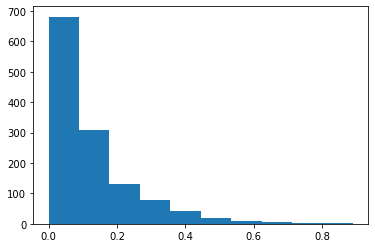

In [80]:
plt.hist(np.unique(ndata))

In [81]:
for i in unis_vect.index:
    print(len(unis_vect.loc[similarity_fulldf[i][(similarity_fulldf[i]>0.6) & (similarity_fulldf[i]<2)].sort_values(ascending=False).index]),unis_vect.loc[i,'nom'])

3 Université Cheikh Anta Diop de Dakar (UCAD)
0 Université Gaston Berger de Saint-Louis (UGB)
0 Université Dakar Bourguiba (UDB)
5 Université du Sahel
0 Agence universitaire de la Francophonie (AUF)
3 Université de Ziguinchor
1 Université de Bambey (Dakar)
0 Université virtuelle du Sénégal
1 Université de Bambey
1 Université Amadou Hampathé Ba de Dakar
0 Ecoles de formation et Instituts
0 Institut supérieur d’entrepreneurship et de gestion (ISEG)
0 Université internationale des diasporas africaines (UNIDAF)
0 Institut privé de formation et de recherches médicales de Dakar (IPFORMED)
0 École Supérieure d’Électricité, de Bâtiment et des Travaux Publics (ESEBAT)
0 Institut supérieur de commerce et de management (ISCOM)
0 Groupe AFI, l’université de l’entreprise
0 Institut privé d’études et de formation en statistiques appliquées et en gestion et évaluation de projet (INEFSAGEP)
0 Institut supérieur d’ingénierie territoriale en Afrique (ISIT)
0 IQRA – Language and Technology Institute
1 In

In [82]:
len(unis_vect)

86